# IMDB 리뷰 데이터셋

- 유명한 인터넷 영화 데이터베이스인 imdb.com 에서 수집한 리뷰를 감상펴에 따라 긍정과 부정으로 분류해 놓은 말뭉치

## 자연어 처리(netural language processing, NLP)

- 컴퓨터를 사용해 인간의 언어를 처리하는 분야
- 세부 분야
    - 음석 인식
    - 기계 번역
    - 감성 분석
- 자연어 처리 분야에서는 훈련 데이터를 말뭉치(corpus)라고 부름

## 임베딩

<img src = "./img/embedding.png">

- 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 나눈 결과 혹은 그 과정 전체

- 컴퓨터에서 처리하는 모든 것은 숫자로 이루어진 데이터
    - 따라서 텍스트 그 자체를 신경망에 전달하지 않음
    - 합성곱 신경망에서 이미지를 다룰 때는 이미지가 정수 픽셀값으로 이루어져 있어서 특별히 변환을 하지 않음
    
- 텍스트 임베딩의 가장 쉬운 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것
    - 예)
        - he : 10
        - follows : 11
        - the : 12
        - cat : 13
   - 단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없음
        - he를 10으로 매핑하고 cat을 13에 매핑하더라도 cat이 he보다 좋거나 크다는 뜻이 아님
    - 정수 중 몇 가지는 특정한 용도로 예약되어 있는 경우가 많음
        - 예) 0 : 패딩, 1 : 문장의 시작, 2 : 어휘 사전에 없는 토큰
            - 어휘 사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목록

- 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리
    - 이렇게 분리된 단어를 토큰(token)이라고 부름
        - 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 이 때 하나의 토큰이 하나의 타임 스텝에 해당
    - 영어 말뭉치에서 토큰은 단어와 같이 취급하는 경우가 많음
        - 한국어는 조사가 발달되어 있어 공백으로 나누는 것만으로는 부족함
            - 일반적으로 한글은 형태소 분석을 통해 토큰을 분리

# 원핫 인코딩을 활용한 RNN 텍스트 분류

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용
# num_words : 단어 빈도가 많은 순서로 num_words만큼 보존한다
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)

In [3]:
# 훈련 세트, 테스트 세트의 크기 확인
print(x_train.shape, x_test.shape)

(25000,) (25000,)


In [4]:
# 리뷰의 길이 출력
print(len(x_train[0]), len(x_train[1]))

218 189


In [5]:
type(x_train[0])

list

- 각각 25000개의 샘플로 이루어져 있음
- 텍스트 길이가 제각각임
    - 고정 크기의 2차원 배열에 담는 것 보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음

In [6]:
# 첫 번째 리뷰 출력
print(x_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 타깃 데이터
# 0 : 부정, 1 : 긍정
print(y_train[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 4)

### 각 리뷰의 길이 확인

- 각 리뷰의 길이를 넘파이 배열로 담아 평균 리뷰 걸이, 길이 최솟값, 길이 최댓값을 확인

In [9]:
lengths = np.array([len(x) for x in x_train])

In [10]:
# 길이 평균값과 중간값, 최솟값, 최댓값
print(np.mean(lengths), np.median(lengths), np.min(lengths), np.max(lengths))

238.1658 177.0 11 2494


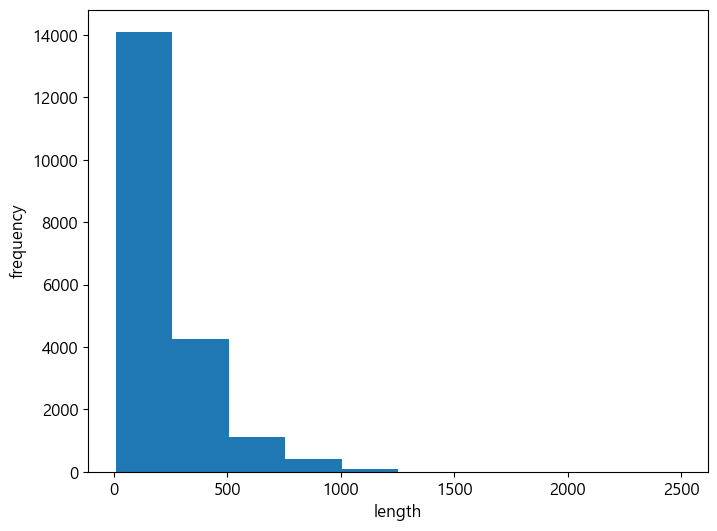

In [11]:
plt.figure()

plt.hist(lengths)

plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

- 평균이 중간값보다 높은 이유는 아주 큰 데이터가 있기 때문
- 대부분의 리뷰는 짧기 때문에 이번 예제에서는 리뷰의 길이를 100에 맞춰서 사용
    - 100보다 짧은 리뷰는 길이를 100에 맞추기 위해서 패딩이 필요
        - 패딩을 나타내는 토큰으로는 0을 사용

In [12]:
# x_train의 길이를 100으로 맞추기
train_seq = pad_sequences(x_train, maxlen = 100)

- maxlen에 원하는 길이를 지정하면 그것보다 긴 경우는 잘나내고 짧은 경우는 0으로 패딩

In [13]:
# train_seq 크기 확인
print(train_seq.shape)

(20000, 100)


In [14]:
print(train_seq[0])

[ 35   2   2   2   4 481   2   2  53  17   6   2   2  74  15   7   2   2
   2   2 198   2   2 467   2 103  94   2   2 350   2   2   2 179   2   5
   2   6   2 471  26   2   5 157 125 257   2   2   2   2  56   4   2  17
   4   2  37   2 225  53 170  23  74  51   9 112   2  23  35   2   2 177
   2   2   2  34   2   2   5   2   2   2  10  10   6   2   2  21   2   2
 453   2  34  94 107   2   5  49   2   2]


In [15]:
print(x_train[0])

[1, 2, 2, 2, 106, 18, 4, 2, 2, 7, 6, 2, 351, 2, 2, 116, 17, 2, 2, 2, 18, 49, 2, 2, 2, 21, 2, 2, 2, 314, 2, 14, 2, 2, 365, 9, 6, 2, 7, 2, 2, 2, 5, 2, 114, 2, 2, 23, 94, 55, 2, 381, 48, 2, 2, 2, 2, 2, 5, 2, 2, 66, 36, 92, 79, 8, 81, 32, 15, 76, 262, 315, 4, 2, 2, 2, 2, 121, 36, 2, 2, 11, 6, 2, 315, 4, 2, 2, 8, 2, 6, 2, 19, 158, 2, 2, 2, 449, 253, 21, 14, 9, 54, 4, 2, 48, 2, 2, 9, 2, 200, 2, 5, 2, 105, 103, 6, 2, 2, 7, 2, 5, 2, 2, 2, 429, 257, 85, 4, 107, 216, 8, 35, 2, 15, 2, 98, 2, 257, 2, 2, 5, 28, 6, 2, 2, 14, 62, 140, 23, 8, 297, 6, 2, 173, 11, 4, 2, 333, 320, 7, 4, 65, 19, 15, 2, 2, 2, 131, 68, 2, 402, 23, 2, 225, 53, 21, 51, 75, 79, 9, 2, 5, 14, 9, 2, 34, 15, 2, 43, 2, 50, 2, 277, 15, 238, 43, 97, 25, 2, 2, 2, 8, 79, 15, 46, 7, 4, 2, 10, 10, 4, 2, 9, 2, 2, 21, 2, 2, 18, 12, 5, 14, 186, 2, 224, 8, 2, 19, 94, 2, 2, 2, 2, 106, 17, 4, 172, 2, 9, 2, 120, 5, 120, 174, 5, 25, 124, 142, 9, 24, 179, 208, 5, 4, 2, 2, 266, 83, 297, 150, 285, 15, 127, 2, 2, 99, 2, 21, 4, 2, 2, 9, 2, 4, 2, 2, 2

In [16]:
print(x_train[0][-10:])

[453, 2, 34, 94, 107, 2, 5, 49, 2, 2]


- pad_sequences()함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 잘라냄
    - 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하기 때문에
        - 리뷰끝에 결정적인 소감을 말할 가능성이 높음
    - 시퀀스의 뒷부분을 잘라내고 싶다면
        - truncating 매개변수 값을 "post"로 변경
            - 기본값은 "pre"

In [17]:
train_seq[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   2,  31,   7,   4,   2,
         7,   4,   2, 182,  14,  22,   9,  24,   2,   8,  30,   2,   4,
       350,   2, 108,   7,  32,  58,  10,  10,  48,  25, 296,  14,  22,
         5, 197,  12,  16, 233,  85,  74, 389,   2, 387,  72, 124,  89,
         2,   2, 239,   9,  17,  52,  17,  12, 214])

- 패딩 토큰은 시퀀스 앞부분에 추가됨
    - 시퀀스의 마지막에 있는 단어가 셀의 은닉상태에 가장 큰 영향을 미치게 되기 때문에
    - 뒷부분에 패딩을 추가하고 싶다면
        - padding 매개변수의 값을 "post"로 수정
            - 기본값은 "pre"

In [18]:
# 검증 세트의 길이를 100으로 맞추기
val_seq = pad_sequences(x_val, maxlen = 100)

## 모델 구성

- 케라스의 SimpleRNN 클래스 사용
- 이진 분류
    - 출력층은 1개의 뉴런을 가지고 시그모이드 출력층 함수를 사용

In [19]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

- SimpleRNN
    - 첫 번째 매개변수는 사용할 유닛의 개수
    - input_shape
        - 입력 차원의 첫 번째 차원은 샘플의 길이
        - 입력 차원의 두 번째 차원은 고유한 단어 수(num_words)
            - load_data()함수에서 500개의 단어만 사용하도록 지정했기 때문에 이번 예제의 고유한 단어 수는 500
   - activation
       - 기본값은 "tanh"
           - 하이퍼볼릭 탄젠트
           
- 원핫인코딩을 사용하는 이유
    - 토큰을 정수로 변환한 데이터를 그대로 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만듦
        - 정수 사이에는 어떤 관련도 없고 20번 토큰이 10번 토큰보다 중요한 것이 아님

In [20]:
# 케라스에서 제공하는 원핫인코딩을 위한 함수
train_oh = keras.utils.to_categorical(train_seq)

In [21]:
print(train_oh.shape)

(20000, 100, 500)


In [22]:
print(train_oh[0][0][:100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [23]:
print(np.sum(train_oh[0][0]))

1.0


- 하나의 원소만 1이고 나머지 원소는 모두 0임

In [24]:
# val_seq 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- SimpleRNN에 전달할 샘플의 크기는 (100, 500)이지만 순환층은 마지막 타임스텝의 은닉상태만 출력
    - 출력의 크기가 순환층의 뉴런 개수와 동일
    
- 파라미터 개수
    - 입력 토큰은 500차원의 원핫인코딩 배열
    - 배열이 순환층의 뉴런 8개와 완전연결
        -  500 * 8 = 4000
    - 순환층의 은닉상태는 다시 다음 타임스텝에 사용하기 위해 또 다른 가중치와 곱해짐
        - 은닉 상태의 크기 * 유닛 개수
            - 8 * 8 = 64
    - 각 뉴런마다 하나의 절편
        - 8
    - 4000 + 64 + 8 = 4072

## 모델 훈련

In [26]:
rmsprop  = keras.optimizers.RMSprop(learning_rate = 1e-4)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-simplernn-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

In [27]:
history = model.fit(train_oh, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_oh, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 [==============================] - 14s 38ms/step - loss: 0.6927 - accuracy: 0.5205 - val_loss: 0.6819 - val_accuracy: 0.5728
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6782 - accuracy: 0.5776 - val_loss: 0.6699 - val_accuracy: 0.6088
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6645 - accuracy: 0.6205 - val_loss: 0.6572 - val_accuracy: 0.6386
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6500 - accuracy: 0.6521 - val_loss: 0.6438 - val_accuracy: 0.6602
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6343 - accuracy: 0.6796 - val_loss: 0.6297 - val_accuracy: 0.6800
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6177 - accuracy: 0.6983 - val_loss: 0.6148 - val_accuracy: 0.6920
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5972 - accuracy: 0.7190 - val_loss: 0.5974 - val_accura

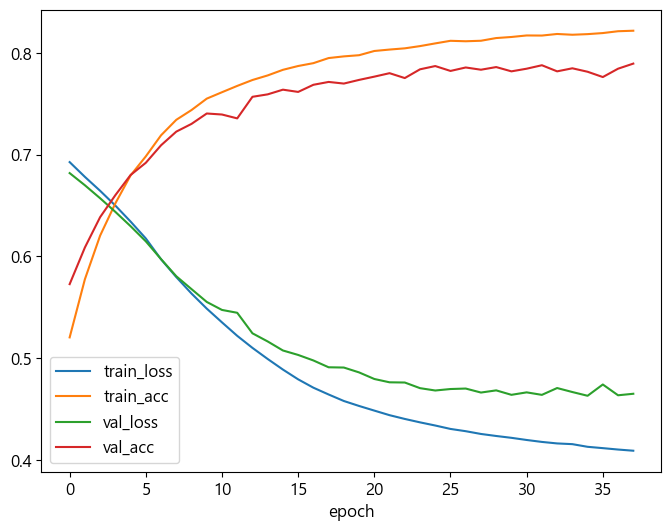

In [28]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 원핫인코딩의 단점
    - 입력 데이터가 매우 커짐

In [29]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [30]:
train_oh.nbytes / train_seq.nbytes

500.0

- 토큰 1개를 500차원으로 늘렸기 때문에 500배가 커짐
    - 훈련 데이터가 커질수록 문제가 더 심해짐

# 단어 임베딩을 활용한 RNN 텍스트 분류

<img src = "./img/embedding.png">

- 단어 임베딩(word embedding)
    - 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법
    - 각 단어를 고정된 크기의 실수 벡터로 변환
    
- 단어 임베딩으로 만들어진 벡터는 원핫인코딩보다 훨씬 의미있는 값으로 채워져 있음
    - 자연어 처리에서 더 좋은 성능을 내는 경우가 많음
    - 단어 임베딩 벡터를 만드는 층은 Embedding 클래스로 케라스에서 제공
        - 처음에는 모든 벡터가 랜덤하게 초기화되고 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습
        
- 단어 임베딩의 장점
    - 입력으로 정수 데이터를 받음
        - 원핫인코딩으로 변경된 배열이 아니라 train_seq를 바로 사용할 수 있음
        - 메모리를 훨씬 효율적으로 사용할 수 있음
    - 원핫인코딩보다 훨씬 작은 크기로도 단어를 잘 표현할 수 있음

In [31]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

- Embedding
    - 첫 번째 매개변수는 어휘 사전의 크기
        - 앞에서 IMDB 데이터셋에서 500개의 단어만 사용하도록 설정했기 때문에 같은 값으로 설정
    - 두 번째 매개변수 임베딩 벡터의 크기
    - input_length 매개변수는 입력 시퀀스의 길이
        - 앞에서 샘플의 길이를 100으로 맞추어서 같은 값으로 설정

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Embedding
    - (100,) 크기의 입력을 받아 (100, 16) 크기의 출력을 만듦
    - 500개의 각 토큰을 크기가 16인 벡터로 변경
        - 500 * 16 = 8000개의 파라미터를 가짐
        
- SimpleRNN
    - 임베딩 벡터의 크기가 16, 유닛의 개수가 8
        - 16 * 8 = 128
    - 은닉 상태에 곱해지는 가중치
        - 8 * 8 = 64
    - 8개의 절편
    - 128 + 64 + 8 = 200

In [33]:
rmsprop  = keras.optimizers.RMSprop(learning_rate = 1e-4)
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-embedding-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

In [34]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 16ms/step - loss: 0.6963 - accuracy: 0.5052 - val_loss: 0.6875 - val_accuracy: 0.5406
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6723 - accuracy: 0.6083 - val_loss: 0.6654 - val_accuracy: 0.6308
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6500 - accuracy: 0.6747 - val_loss: 0.6480 - val_accuracy: 0.6756
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6318 - accuracy: 0.7067 - val_loss: 0.6336 - val_accuracy: 0.6950
Epoch 5/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6149 - accuracy: 0.7274 - val_loss: 0.6180 - val_accuracy: 0.7158
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5989 - accuracy: 0.7409 - val_loss: 0.6054 - val_accuracy: 0.7304
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5828 - accuracy: 0.7543 - val_loss: 0.5916 - val_accuracy:

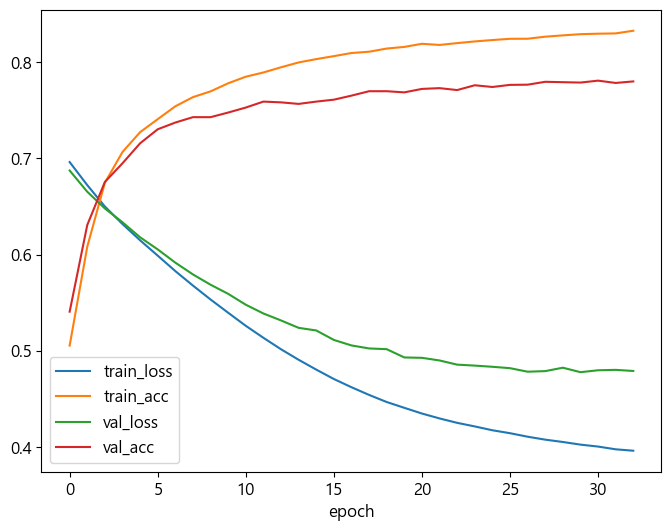

In [35]:
plt.figure()
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()